## Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## Load and Explore the MNIST Dataset

11490434/11490434 [==============================] - 6s 1us/step


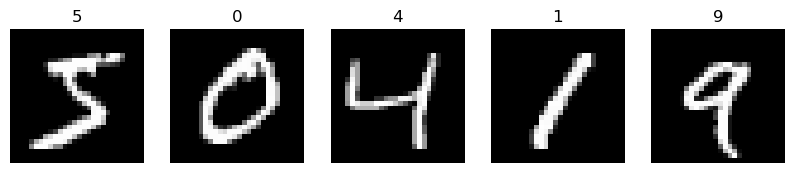

In [3]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Display a few examples
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(str(y_train[i]))
    plt.axis('off')
plt.show()


## Preprocess the Data

In [5]:
# Flatten the images to one-dimensional arrays
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

# Convert labels to one-hot encoding
y_train_onehot = keras.utils.to_categorical(y_train, 10)
y_test_onehot = keras.utils.to_categorical(y_test, 10)


## Build the Neural Network

In [6]:
model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## Train the Model

In [7]:
history = model.fit(x_train_flat, y_train_onehot, epochs=10, validation_split=0.2, batch_size=128)


Epoch 1/10


375/375 [==============================] - 6s 10ms/step - loss: 0.4386 - accuracy: 0.8737 - val_loss: 0.2130 - val_accuracy: 0.9411
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2126 - accuracy: 0.9394 - val_loss: 0.1577 - val_accuracy: 0.9552
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1626 - accuracy: 0.9528 - val_loss: 0.1248 - val_accuracy: 0.9632
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1325 - accuracy: 0.9614 - val_loss: 0.1114 - val_accuracy: 0.9668
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1109 - accuracy: 0.9678 - val_loss: 0.0994 - val_accuracy: 0.9715
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0954 - accuracy: 0.9717 - val_loss: 0.0911 - val_accuracy: 0.9728
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0854 - accuracy: 0.9742 - val_loss: 0.0881 - val_accuracy: 0.9739
Epo

## Evaluate the Model

In [8]:
test_loss, test_acc = model.evaluate(x_test_flat, y_test_onehot)
print(f"Test accuracy: {test_acc}")


313/313 [==============================] - 1s 3ms/step - loss: 0.0753 - accuracy: 0.9769
Test accuracy: 0.9768999814987183


## Make Predictions

1/1 [==============================] - 0s 191ms/step


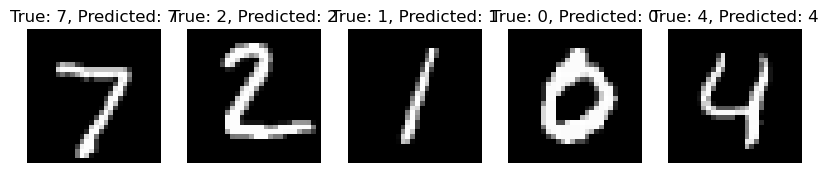

In [9]:
# Make predictions on a few test samples
predictions = model.predict(x_test_flat[:5])
predicted_labels = np.argmax(predictions, axis=1)

# Display the results
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}, Predicted: {predicted_labels[i]}")
    plt.axis('off')
plt.show()
